**Assignment 1**

1)Xử lý file dữ liệu

In [94]:
import pandas as pd


df = pd.read_csv("/content/data.csv", sep=";", encoding="utf-8")
#Tách ô với mỗi dấu";"

df["Target"] = df["Target"].replace({"Graduate": 1, "Dropout": 0, "Enrolled": 0})
#Chuyển kiểu dữ liệu cho cột Target,y



df.to_csv("/content/cleaned_file.csv", index=False, encoding="utf-8")


<ipython-input-94-7cd45c57e88e>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Target"] = df["Target"].replace({"Graduate": 1, "Dropout": 0, "Enrolled": 0})


2) Hàm Logistics Regression

In [95]:
import numpy as np
from sklearn.preprocessing import StandardScaler
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.losses = []  # Lưu lại các giá trị loss trong quá trình huấn luyện

    def sigmoid(self, z):

        return 1 / (1 + np.exp(-z))


    def compute_cost(self, X, y):
        m = len(y)
        predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return cost
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)  # Khởi tạo weights bằng 0
        self.bias = 0  # Khởi tạo bias bằng 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias  # Hàm tuyến tính

            predictions = self.sigmoid(linear_model)  # Dự đoán với hàm sigmoid

            # Tính toán gradient
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)

            # Cập nhật weights và bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Tính chi phí và lưu lại
            cost = self.compute_cost(X, y)
            self.losses.append(cost)  # Lưu lại giá trị loss

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias  # Hàm tuyến tính
        y_predicted = self.sigmoid(linear_model)  # Dự đoán với hàm sigmoid
        return (y_predicted > 0.5).astype(int)  # Trả về 0 hoặc 1

    def accuracy(self, y_true, y_pred):
        # Tính độ chính xác
        return np.mean(y_true == y_pred)

    def get_params(self):
        # Trả về các tham số của mô hình
        return {'learning_rate': self.learning_rate, 'num_iterations': self.num_iterations}


3) Train mô hình và hiển thị loss

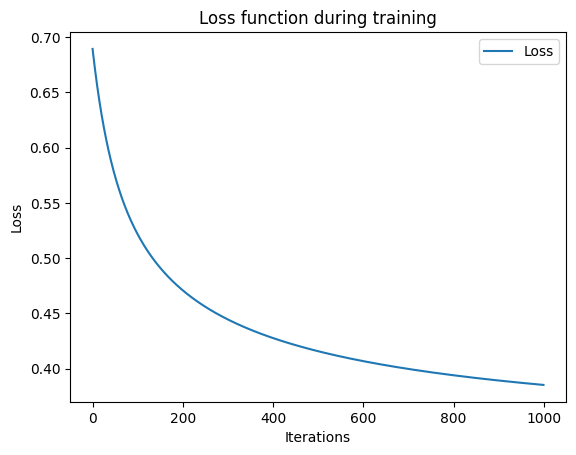

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
data =pd.read_csv('/content/cleaned_file.csv')



data.head()
X,y = data.iloc[:,:-1],data.iloc[:,-1]
scaler = StandardScaler()
X = scaler.fit_transform(X)

model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X, y)
y_pred = model.predict(X)
accuracy = model.accuracy(y, y_pred)

plt.plot(range(model.num_iterations), model.losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss function during training')
plt.legend()
plt.show()


**Assignment 2**

Xử lí bộ dữ liệu

In [97]:
import pandas as pd


df = pd.read_csv("/content/data.csv", sep=";", encoding="utf-8")
#Tách ô với mỗi dấu";"

df["Target"] = df["Target"].replace({"Graduate": 1, "Dropout": 0, "Enrolled": 2})
#Chuyển kiểu dữ liệu cho cột Target,y



df.to_csv("/content/cleaned_file_softmax.csv", index=False, encoding="utf-8")


<ipython-input-97-377241be82fa>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Target"] = df["Target"].replace({"Graduate": 1, "Dropout": 0, "Enrolled": 2})


1) Softmax Regression

In [98]:
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, num_classes=3):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.num_classes = num_classes
        self.weights = None
        self.bias = None
        self.losses = []

    def softmax(self, z):
        # Áo dụng softmax cho mỗi dòng
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def compute_cost(self, predictions, y):
        m = len(y)

        y_one_hot = np.eye(self.num_classes)[y]
        #  Dùng Cross-entropy loss
        cost = (-1 / m) * np.sum(y_one_hot * np.log(predictions))
        return cost

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros((num_features, self.num_classes))
        self.bias = np.zeros(self.num_classes)

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.softmax(linear_model)

            # Gradient của hàm loss function
            dw = (1 / num_samples) * np.dot(X.T, (predictions - np.eye(self.num_classes)[y]))
            db = (1 / num_samples) * np.sum(predictions - np.eye(self.num_classes)[y], axis=0)

            # Cập nhật weights và bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Tính toán loss
            cost = self.compute_cost(predictions, y)
            self.losses.append(cost)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.softmax(linear_model)
        return np.argmax(predictions, axis=1)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

    def get_params(self):
        return {'learning_rate': self.learning_rate, 'num_iterations': self.num_iterations}

2) Train và hiển thị loss

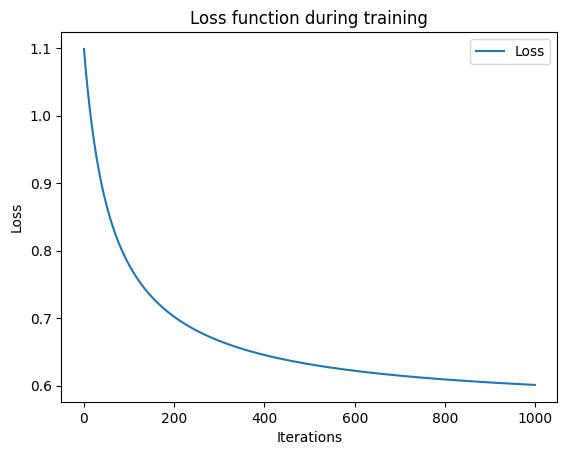

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
data =pd.read_csv('/content/cleaned_file_softmax.csv')



data.head()
X,y = data.iloc[:,:-1],data.iloc[:,-1]
scaler = StandardScaler()
X = scaler.fit_transform(X)


model = SoftmaxRegression(learning_rate=0.01, num_iterations=1000,num_classes=3)
model.fit(X, y)
y_pred = model.predict(X)
accuracy = model.accuracy(y, y_pred)

plt.plot(range(model.num_iterations), model.losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss function during training')
plt.legend()
plt.show()

Assignment **3**

1) Logistics Regression dùng thư viện

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Đọc dữ liệu
df = pd.read_csv("/content/cleaned_file.csv")

# Chọn các đặc trưng (X) và nhãn (y)
X = df.drop(columns=["Target"])
y = df["Target"]

# Chia dữ liệu thành bộ huấn luyện và bộ kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Dự đoán trên bộ kiểm tra
y_pred = log_reg.predict(X_test_scaled)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Độ chính xác của Logistic Regression: {accuracy}")
print(f"Báo cáo phân loại:\n{report}")


Độ chính xác của Logistic Regression: 0.8282485875706215
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       467
           1       0.78      0.88      0.83       418

    accuracy                           0.83       885
   macro avg       0.83      0.83      0.83       885
weighted avg       0.83      0.83      0.83       885



2) Softmax Regression dùng thư viện

In [103]:
from sklearn.linear_model import LogisticRegression

# Cập nhật nhãn mục tiêu cho phân loại đa lớp
df["Target"] = df["Target"].replace({1: 0, 0: 1})  # Cập nhật thành phân loại đa lớp (Tốt nghiệp=0, Bỏ học=1)

# Chọn các đặc trưng (X) và nhãn (y) cho phân loại đa lớp
X = df.drop(columns=["Target"])
y = df["Target"]

# Chia dữ liệu thành bộ huấn luyện và bộ kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình softmax regression (Multinomial Logistic Regression)
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_reg.fit(X_train_scaled, y_train)

# Dự đoán trên bộ kiểm tra
y_pred = softmax_reg.predict(X_test_scaled)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Độ chính xác của Softmax Regression: {accuracy}")
print(f"Báo cáo phân loại:\n{report}")


Độ chính xác của Softmax Regression: 0.8293785310734463
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       418
           1       0.88      0.78      0.83       467

    accuracy                           0.83       885
   macro avg       0.83      0.83      0.83       885
weighted avg       0.83      0.83      0.83       885



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
